In [4]:
!pip install --ignore-installed blinker

  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)


In [5]:
!pip install -U PyMySQL sqlalchemy flask pyngrok geopandas pygeos sodapy

  Using cached flask-2.3.3-py3-none-any.whl (96 kB)
  Using cached sodapy-2.2.0-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: flask
    Found existing installation: Flask 2.2.5
    Uninstalling Flask-2.2.5:
      Successfully uninstalled Flask-2.2.5


In [7]:
import pandas as pd
from sqlalchemy import create_engine
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sodapy import Socrata
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **NYC Monthly Tonnage Data**

In [9]:
client = Socrata('data.cityofnewyork.us',
                 '7lNEaKU6tflxrc2RGLtO8riHn',
                 username="cv25h2tpnfgm0x6xor5wfx2pt",
                 password="1hdkfdyecseu5ryqf64y0rnkszph7oyf8h0o1zzjw2krtwl73p")


results = client.get("ebb7-mvp5", limit=23000)

# Convert to pandas DataFrame
q5 = pd.DataFrame.from_records(results)

In [10]:
q5 = q5.drop(['communitydistrict','borough_id'], axis=1)
q5.columns = q5.columns.str.upper()

In [11]:
#add year var
q5['year'] = pd.DatetimeIndex(q5['MONTH']).year
# q5['year'] = pd.DatetimeIndex(q5['MONTH']).year
q5['month'] = pd.DatetimeIndex(q5['MONTH']).month

In [12]:
q5.loc[:,'REFUSETONSCOLLECTED':'XMASTREETONS'] = q5.loc[:,'REFUSETONSCOLLECTED':'XMASTREETONS'].astype(float).round(2)
q5.loc[:, 'REFUSETONSCOLLECTED':'XMASTREETONS'] = q5.loc[:, 'REFUSETONSCOLLECTED':'XMASTREETONS'].fillna(0)

<ipython-input-12-f6bacf7155a4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  q5.loc[:,'REFUSETONSCOLLECTED':'XMASTREETONS'] = q5.loc[:,'REFUSETONSCOLLECTED':'XMASTREETONS'].astype(float).round(2)


### NYC Yearly Total Waste

In [13]:
totalWaste = q5.loc[:,'REFUSETONSCOLLECTED':'XMASTREETONS'].T.sum()
q5['totalWaste'] = totalWaste

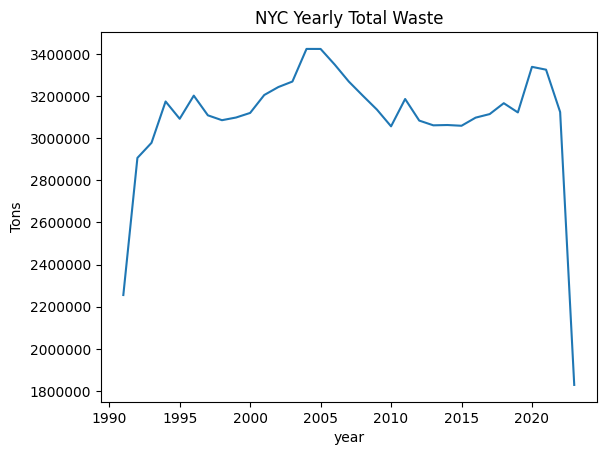

In [14]:
yearly_data = q5.loc[:,'year':'totalWaste']
yearly_data = yearly_data.groupby('year')['totalWaste'].sum()
yearly_data.plot(x ='year', y='totalWaste', kind='line')
plt.ylabel('Tons')
plt.title('NYC Yearly Total Waste')
plt.ticklabel_format(useOffset=False, style='plain')

In [15]:
yearly_data_chart_years = list(yearly_data.index)
yearly_data_chart_values = yearly_data.to_list()

### NYC Yearly Paper Waste

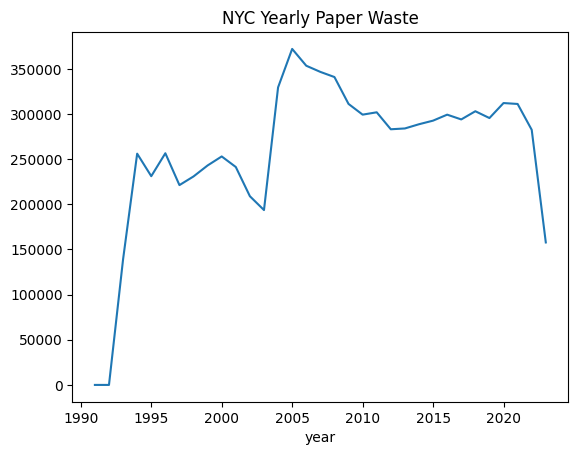

In [16]:
yearly_paper = q5.loc[:, ['PAPERTONSCOLLECTED','year']]
yearly_paper = yearly_paper.groupby('year')['PAPERTONSCOLLECTED'].sum()
yearly_paper.plot(x ='year', y='PAPERTONSCOLLECTED', kind='line')
#plt.ylim(90, 100)
plt.title('NYC Yearly Paper Waste')
plt.ticklabel_format(useOffset=False, style='plain')

In [17]:
yearly_paper_chart_years = list(yearly_paper.index)
yearly_paper_chart_values = yearly_paper.to_list()

### NYC Yearly Refuse Waste

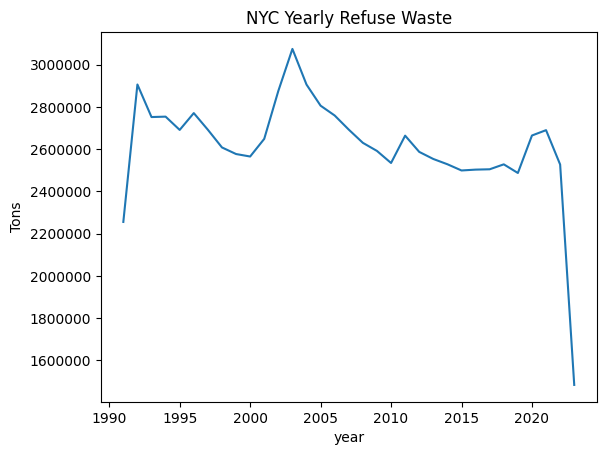

In [18]:
#yearly tons of refuse collected
yearly_refuse = q5.loc[:,'REFUSETONSCOLLECTED':'year']
yearly_refuse = yearly_refuse.groupby('year')['REFUSETONSCOLLECTED'].sum()
yearly_refuse.plot(x ='year', y='REFUSETONSCOLLECTED', kind='line')
#plt.ylim(90, 100)
plt.ylabel('Tons')
plt.title('NYC Yearly Refuse Waste')
plt.ticklabel_format(useOffset=False, style='plain')

In [19]:
yearly_refuse_chart_years = list(yearly_refuse.index)
yearly_refuse_chart_values = yearly_refuse.to_list()

### NYC Yearly Metal, Glass, and Plastic Waste

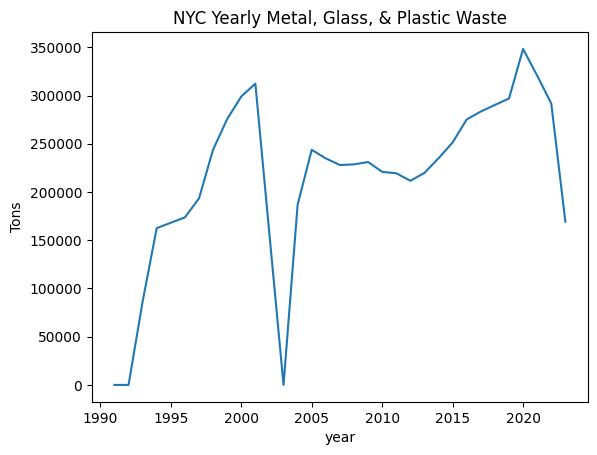

In [20]:
#yearly tons of metal, glass, plastic, & beverage cartons collected
yearly_mgpt = q5.loc[:,'MGPTONSCOLLECTED':'year']
yearly_mgpt = yearly_mgpt.groupby('year')['MGPTONSCOLLECTED'].sum()
yearly_mgpt.plot(x ='year', y='MGPTONSCOLLECTED', kind='line')
#plt.ylim(90, 100)
plt.ylabel('Tons')
plt.title('NYC Yearly Metal, Glass, & Plastic Waste')
plt.ticklabel_format(useOffset=False, style='plain')

In [21]:
yearly_mgpt_chart_years = list(yearly_mgpt.index)
yearly_mgpt_chart_values = yearly_mgpt.to_list()

### Fast Facts 2022

In [22]:
import datetime
today = datetime.date.today()
# current_year = int(today.strftime("%Y"))
current_year = 2022
prev_year = current_year - 1

In [23]:
def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return (current - previous) / previous * 100.0
    except ZeroDivisionError:
        return float('inf')

totalWasteCollected2022 = yearly_data[current_year]
percentageChangeWaste = round(get_change(totalWasteCollected2022, yearly_data[prev_year]),2)
totalPaper2022 = yearly_paper[current_year]
percentageChangePaper = round(get_change(totalPaper2022, yearly_paper[prev_year]),2)
totalRefuse2022 = yearly_refuse[current_year]
percentageChangeRefuse = round(get_change(totalRefuse2022, yearly_refuse[prev_year]),2)
totalMGP2022 = yearly_mgpt[current_year]
percentageChangeMGP = round(get_change(totalMGP2022, yearly_mgpt[prev_year]),2)

### NYC Yealy Total Waste Collected in Last 5 Years

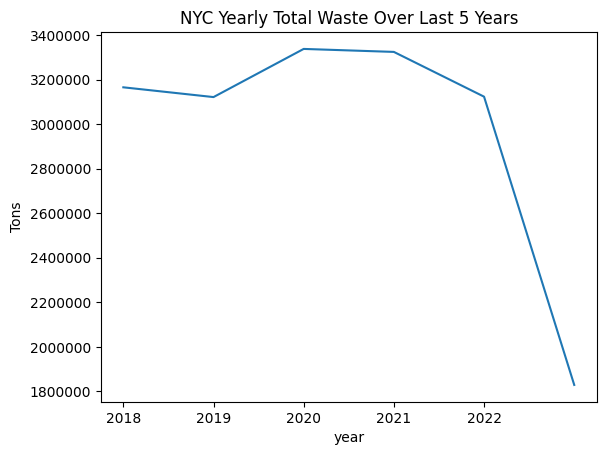

In [24]:
yearly_waste_5 = q5[q5.year>=2018]

#yearly tons of total waste collected
yearly_waste_5 = yearly_waste_5.loc[:,'year':'totalWaste']
yearly_waste_5 = yearly_waste_5.groupby('year')['totalWaste'].sum()
yearly_waste_5.plot(x = 'year', y='totalWaste', kind='line')
plt.ylabel('Tons')
plt.xticks(np.arange(2018,2023))
plt.title('NYC Yearly Total Waste Over Last 5 Years')
plt.ticklabel_format(useOffset=False, style='plain')

## **Waste Analysis - By Boroughs**

### Yearly Total Waste Collected - by Boroughs

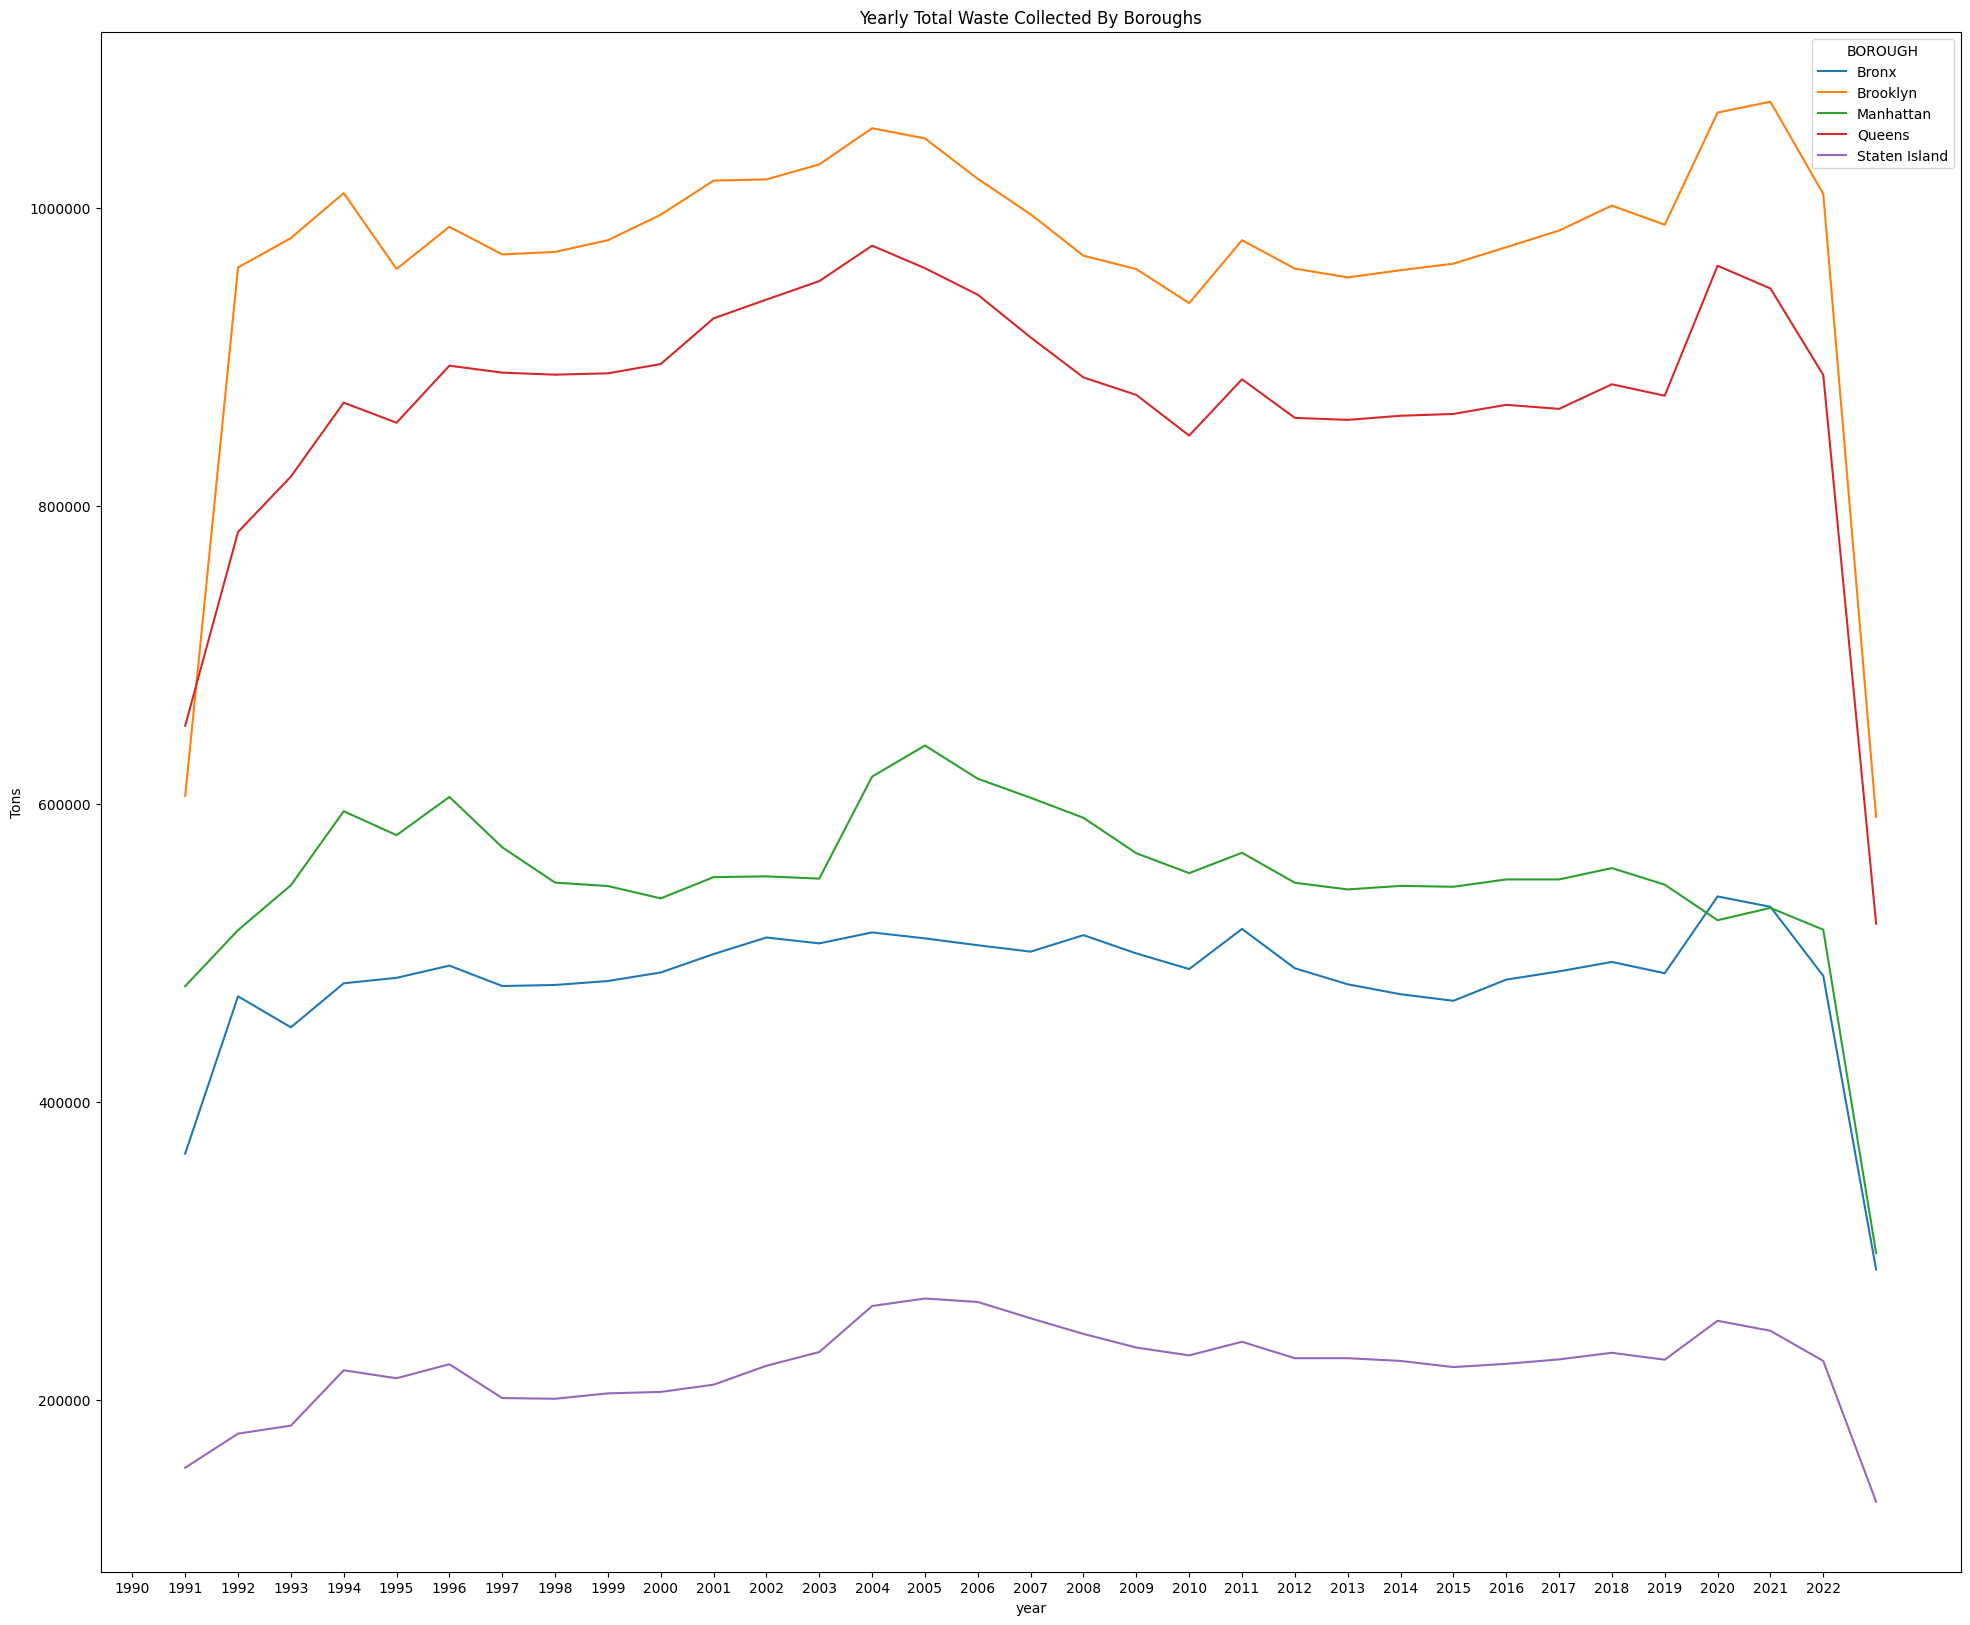

In [25]:
yearly_tonnage_boroughs = q5.groupby(['BOROUGH','year'])['totalWaste'].sum()
# Yearly waste produced by boroughs
yearly_tonnage_boroughs = yearly_tonnage_boroughs.to_frame()
yearly_tonnage_boroughs.pivot_table(
    index='year',
    columns='BOROUGH',
    values='totalWaste',
    aggfunc='sum'
).plot(
    kind='line',
    # subplots=True,
    figsize=(24,20)
)
plt.ylabel('Tons')
plt.title('Yearly Total Waste Collected By Boroughs')
plt.xticks(np.arange(1990,2023))
plt.ticklabel_format(useOffset=False, style='plain')

In [26]:
years_boro_chart = list(yearly_tonnage_boroughs.loc['Bronx'].index)
bronx_total_years = list(yearly_tonnage_boroughs.loc['Bronx'].index)
bronx_values = yearly_tonnage_boroughs.loc['Bronx']['totalWaste'].to_list()
manhattan_total_years = list(yearly_tonnage_boroughs.loc['Manhattan'].index)
manhattan_values = yearly_tonnage_boroughs.loc['Manhattan']['totalWaste'].to_list()
brooklyn_total_years = list(yearly_tonnage_boroughs.loc['Brooklyn'].index)
brooklyn_values = yearly_tonnage_boroughs.loc['Brooklyn']['totalWaste'].to_list()
queens_total_years = list(yearly_tonnage_boroughs.loc['Queens'].index)
queens_values = yearly_tonnage_boroughs.loc['Queens']['totalWaste'].to_list()
staten_total_years = list(yearly_tonnage_boroughs.loc['Staten Island'].index)
staten_values = yearly_tonnage_boroughs.loc['Staten Island']['totalWaste'].to_list()


### Yearly Total Waste Collected by Boroughs - Subplots

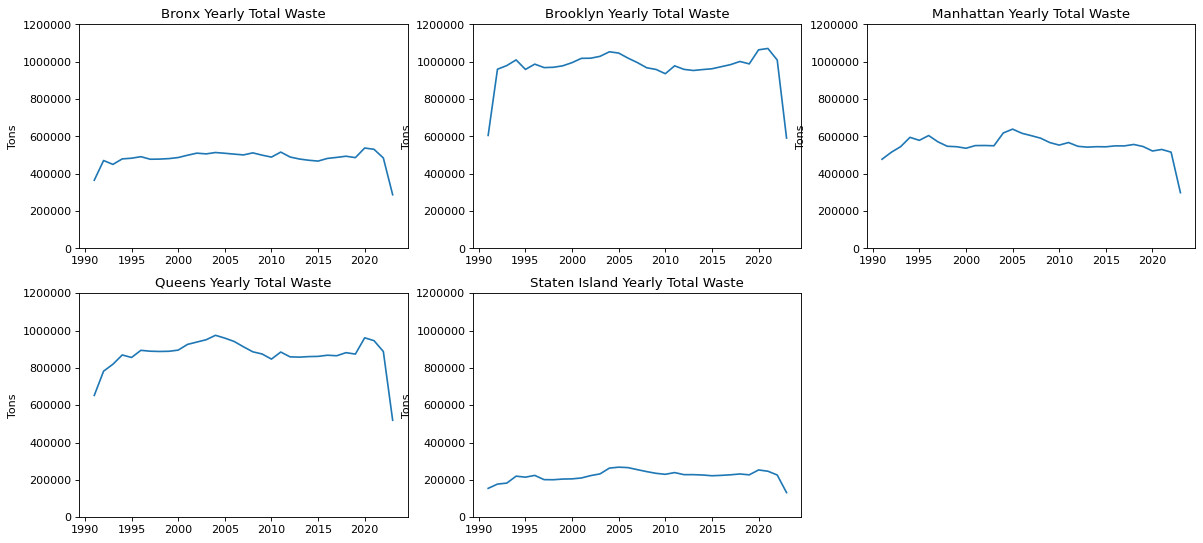

In [27]:
yearly_tonnage_boroughs = q5.groupby(['BOROUGH','year'], as_index=False)['totalWaste'].sum()
plt.figure(figsize=(18, 8), dpi=80) #resize figure

boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
for i, b in enumerate(boroughs):
  curr = yearly_tonnage_boroughs[yearly_tonnage_boroughs.BOROUGH == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(int(subplot_string)) #create the subplot
  plt.plot(curr['year'].values, curr['totalWaste'].values) #plot values
  plt.ylim(0, 1200000)
  plt.ylabel('Tons')
  title = str(b) + ' Yearly Total Waste' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent scientific notation

### Borough Rankings based on Tonnes of Waste Collected from Each Borough

In [28]:
waste_rating = q5[['totalWaste','BOROUGH']].groupby('BOROUGH').sum()
waste_rating = waste_rating.sort_values(by='totalWaste', ascending=False)
waste_rating

,totalWaste
BOROUGH,
Brooklyn,31952971.78
Queens,28773037.51
Manhattan,18172465.90
Bronx,15927526.05
Staten Island,7323769.22


In [29]:
pie_labels = list(waste_rating.index)
pie_values = waste_rating['totalWaste'].to_list()

In [30]:
pie_dict = { }
for i, boro in enumerate(pie_labels):
  pie_dict[i+1] = boro

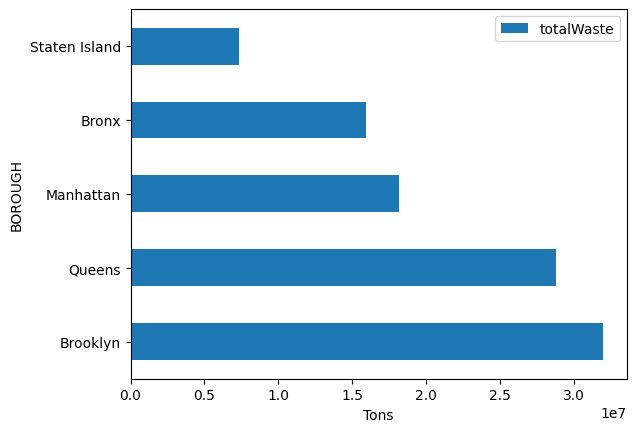

In [31]:
waste_rating.plot(kind='barh')
plt.xlabel('Tons')
plt.ticklabel_format(axis='x', useOffset=False)

### Waste Ratings for 2022

In [32]:
waste_rating2022 = q5.loc[q5.year == current_year]
waste_rating2022 = waste_rating2022[['totalWaste','BOROUGH']].groupby('BOROUGH').sum()
waste_rating2022 = waste_rating2022.sort_values(by='totalWaste', ascending=False)
waste_rating2022

,totalWaste
BOROUGH,
Brooklyn,1009323.00
Queens,887826.91
Manhattan,515593.67
Bronx,484641.35
Staten Island,226202.42


array([<Axes: ylabel='totalWaste'>], dtype=object)

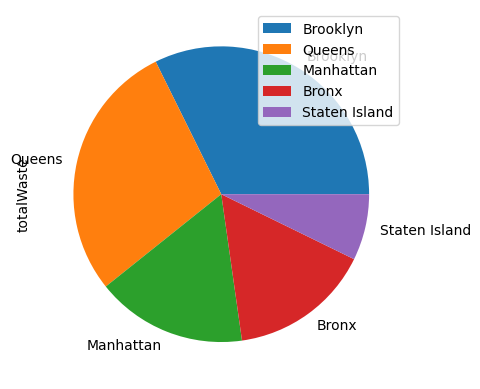

In [33]:
waste_rating2022.plot.pie(subplots=True)

### Yearly Refuse Waste - By Boroughs - Subplots & Rankings

In [34]:
#yearly refuse tons by borough
boro_refuse = q5.groupby(['BOROUGH', 'year'], as_index=False)['REFUSETONSCOLLECTED'].sum()
boro_refuse

,BOROUGH,year,REFUSETONSCOLLECTED
0,Bronx,1991,365367.31
1,Bronx,1992,470892.76
2,Bronx,1993,427840.30
3,Bronx,1994,440798.85
4,Bronx,1995,438483.71
...,...,...,...
160,Staten Island,2019,178370.45
161,Staten Island,2020,200321.56
162,Staten Island,2021,198177.82
163,Staten Island,2022,182085.08


In [35]:
refuse = q5.groupby(['BOROUGH', 'year'])['REFUSETONSCOLLECTED'].sum()
bronx_refuse = refuse['Bronx'].to_list()
bronx_refuse_years = list(refuse['Bronx'].index)
manhattan_refuse = refuse['Manhattan'].to_list()
manhattan_refuse_years = list(refuse['Manhattan'].index)
brooklyn_refuse = refuse['Brooklyn'].to_list()
brooklyn_refuse_years = list(refuse['Brooklyn'].index)
staten_refuse = refuse['Staten Island'].to_list()
staten_refuse_years = list(refuse['Staten Island'].index)
queens_refuse = refuse['Queens'].to_list()
queens_refuse_years = list(refuse['Queens'].index)

In [36]:
# dataframe with descending order by borough on total refuse
refuse_rating = q5[['REFUSETONSCOLLECTED','BOROUGH']].groupby('BOROUGH').sum()
refuse_rating = refuse_rating.sort_values(by='REFUSETONSCOLLECTED', ascending=False)
refuse_rating

,REFUSETONSCOLLECTED
BOROUGH,
Brooklyn,27170589.20
Queens,23936494.73
Manhattan,15121814.73
Bronx,13950129.53
Staten Island,6128816.13


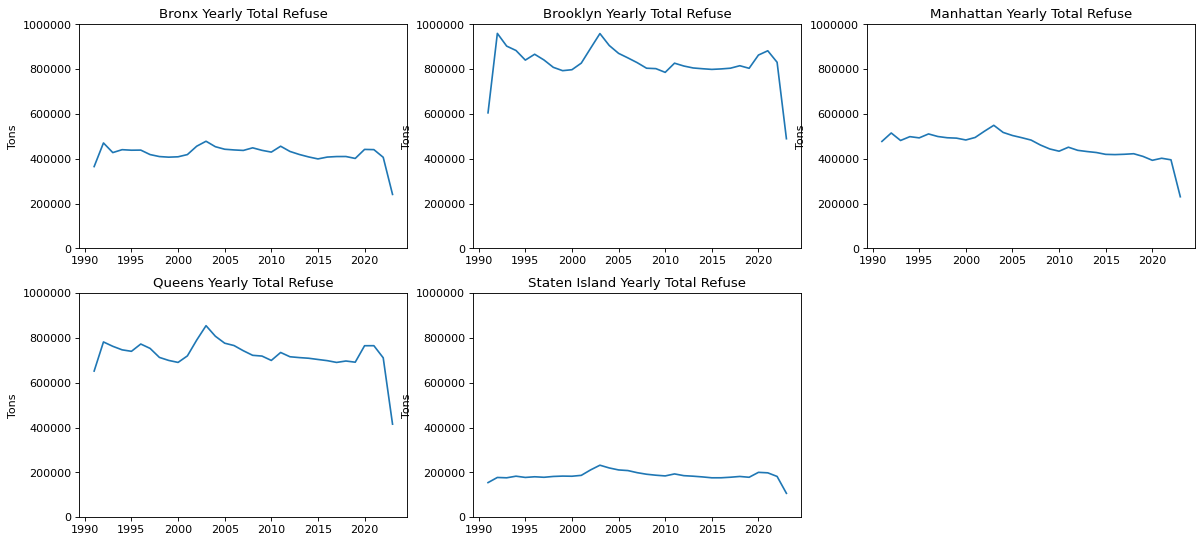

In [37]:
plt.figure(figsize=(18, 8), dpi=80) #resize figure

for i, b in enumerate(boroughs):
  curr = boro_refuse[boro_refuse.BOROUGH == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(int(subplot_string)) #create the subplot
  plt.plot(curr['year'].values, curr['REFUSETONSCOLLECTED'].values) #plot values
  plt.ylim(0, 1000000)
  plt.ylabel('Tons')
  title = str(b) + ' Yearly Total Refuse' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent sci

<Axes: xlabel='BOROUGH'>

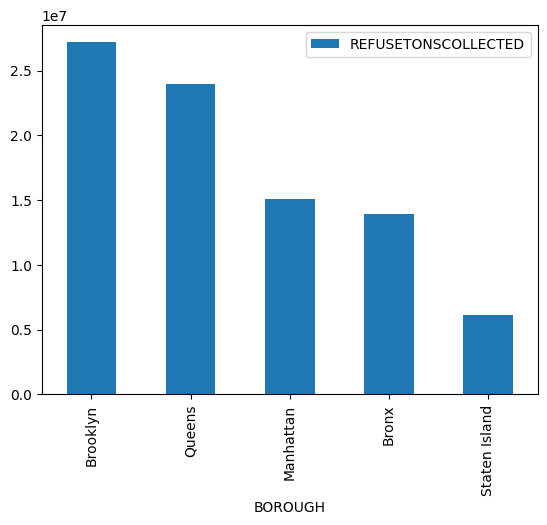

In [38]:
refuse_rating.plot(kind = 'bar')

### Yearly Paper Waste - By Boroughs - Subplots & Rankings

In [39]:
#yearly paper tons by borough
boro_paper = q5.groupby(['BOROUGH', 'year'], as_index=False)['PAPERTONSCOLLECTED'].sum()
boro_paper

,BOROUGH,year,PAPERTONSCOLLECTED
0,Bronx,1991,0.00
1,Bronx,1992,0.00
2,Bronx,1993,12049.53
3,Bronx,1994,20479.84
4,Bronx,1995,23228.58
...,...,...,...
160,Staten Island,2019,22837.74
161,Staten Island,2020,24388.06
162,Staten Island,2021,23205.35
163,Staten Island,2022,21088.45


In [40]:
paper = q5.groupby(['BOROUGH', 'year'])['PAPERTONSCOLLECTED'].sum()
bronx_paper = paper['Bronx'].to_list()
bronx_paper_years = list(paper['Bronx'].index)
manhattan_paper = paper['Manhattan'].to_list()
manhattan_paper_years = list(paper['Manhattan'].index)
brooklyn_paper = paper['Brooklyn'].to_list()
brooklyn_paper_years = list(paper['Brooklyn'].index)
staten_paper = paper['Staten Island'].to_list()
staten_paper_years = list(paper['Staten Island'].index)
queens_paper = paper['Queens'].to_list()
queens_paper_years = list(paper['Queens'].index)

In [41]:
# dataframe with descending order by borough on total paper collected
paper_rating = q5[['PAPERTONSCOLLECTED','BOROUGH']].groupby('BOROUGH').sum()
paper_rating = paper_rating.sort_values(by='PAPERTONSCOLLECTED', ascending=False)
paper_rating

,PAPERTONSCOLLECTED
BOROUGH,
Queens,2647385.96
Brooklyn,2646228.10
Manhattan,1697351.42
Bronx,933638.54
Staten Island,610942.09


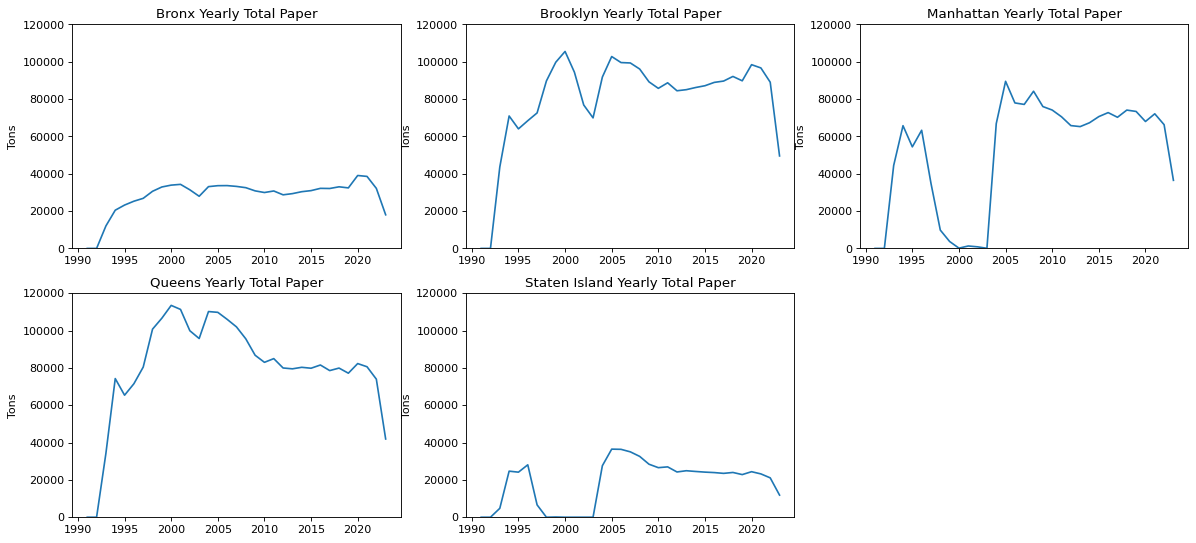

In [42]:
plt.figure(figsize=(18, 8), dpi=80) #resize figure

for i, b in enumerate(boroughs):
  curr = boro_paper[boro_paper.BOROUGH == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(int(subplot_string)) #create the subplot
  plt.plot(curr['year'].values, curr['PAPERTONSCOLLECTED'].values) #plot values
  plt.ylim(0, 120000)
  plt.ylabel('Tons')
  title = str(b) + ' Yearly Total Paper' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent scientific notation

<Axes: xlabel='BOROUGH'>

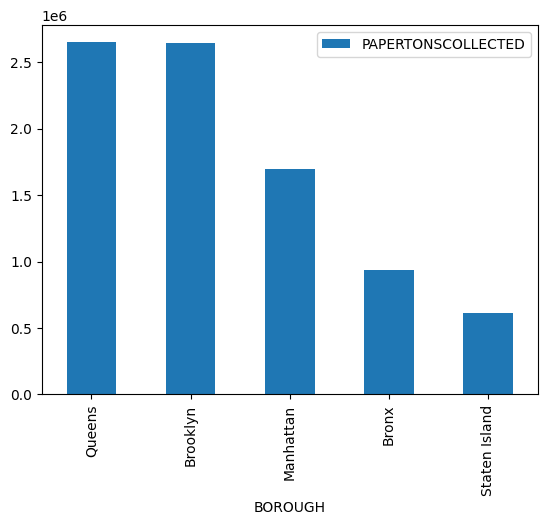

In [43]:
paper_rating.plot(kind = 'bar')

### Yearly Metal, Glass, and Plastic Waste - By Boroughs - Subplots & Rankings

In [44]:
#yearly metal, glass, plastic tons by borough
boro_mgp = q5.groupby(['BOROUGH', 'year'], as_index=False)['MGPTONSCOLLECTED'].sum()
boro_mgp

,BOROUGH,year,MGPTONSCOLLECTED
0,Bronx,1991,0.00
1,Bronx,1992,0.00
2,Bronx,1993,10186.95
3,Bronx,1994,18260.38
4,Bronx,1995,21473.17
...,...,...,...
160,Staten Island,2019,22862.26
161,Staten Island,2020,27759.90
162,Staten Island,2021,24959.04
163,Staten Island,2022,22461.36


In [45]:
mgp = q5.groupby(['BOROUGH', 'year'])['MGPTONSCOLLECTED'].sum()
bronx_mgp = mgp['Bronx'].to_list()
bronx_mgp_years = list(mgp['Bronx'].index)
manhattan_mgp = mgp['Manhattan'].to_list()
manhattan_mgp_years = list(mgp['Manhattan'].index)
brooklyn_mgp = mgp['Brooklyn'].to_list()
brooklyn_mgp_years = list(mgp['Brooklyn'].index)
staten_mgp = mgp['Staten Island'].to_list()
staten_mgp_years = list(mgp['Staten Island'].index)
queens_mgp = mgp['Queens'].to_list()
queens_mgp_years = list(mgp['Queens'].index)

In [46]:
mgp_rating = q5[['MGPTONSCOLLECTED','BOROUGH']].groupby('BOROUGH').sum()
mgp_rating = mgp_rating.sort_values(by='MGPTONSCOLLECTED', ascending=False)
mgp_rating

,MGPTONSCOLLECTED
BOROUGH,
Queens,2099475.03
Brooklyn,2066714.21
Manhattan,1315151.72
Bronx,1013935.58
Staten Island,562791.08


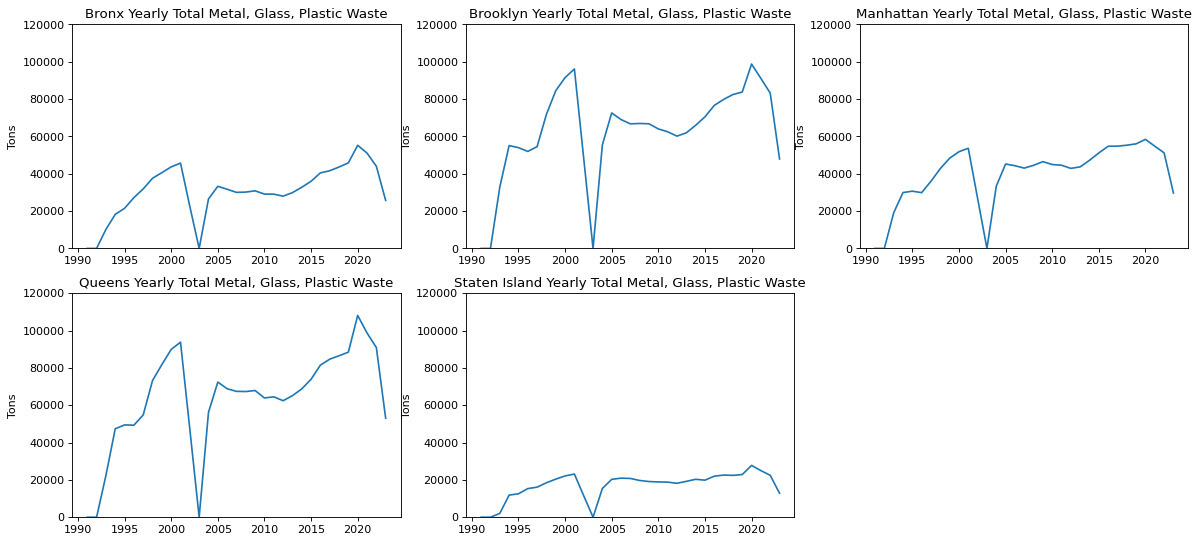

In [47]:
plt.figure(figsize=(18, 8), dpi=80) #resize figure

for i, b in enumerate(boroughs):
  curr = boro_mgp[boro_mgp.BOROUGH == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(int(subplot_string)) #create the subplot
  plt.plot(curr['year'].values, curr['MGPTONSCOLLECTED'].values) #plot values
  plt.ylim(0, 120000)
  plt.ylabel('Tons')
  title = str(b) + ' Yearly Total Metal, Glass, Plastic Waste' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent scientific notation

<Axes: xlabel='BOROUGH'>

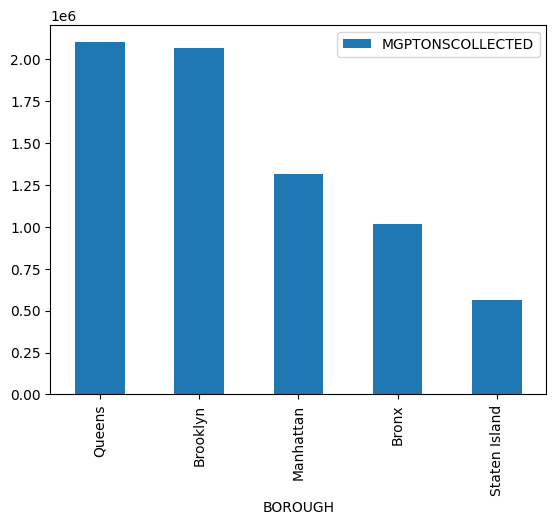

In [48]:
mgp_rating.plot(kind = 'bar')

Monthly Trends for Years in which Max & Min Waste were collected - By Boroughs

In [49]:
# year in which max waste was generated for each borough
yearly_tonnage_boroughs = q5.groupby(['BOROUGH', 'year'])['totalWaste'].sum()
max_waste_year_boroughs = yearly_tonnage_boroughs.groupby(level=0).idxmax()
max_waste_year_boroughs

BOROUGH
Bronx                    (Bronx, 2020)
Brooklyn              (Brooklyn, 2021)
Manhattan            (Manhattan, 2005)
Queens                  (Queens, 2004)
Staten Island    (Staten Island, 2005)
Name: totalWaste, dtype: object

In [50]:
# year in which min waste was generated for each borough
min_waste_year_boroughs = yearly_tonnage_boroughs.groupby(level=0).idxmin()
min_waste_year_boroughs

BOROUGH
Bronx                    (Bronx, 2023)
Brooklyn              (Brooklyn, 2023)
Manhattan            (Manhattan, 2023)
Queens                  (Queens, 2023)
Staten Island    (Staten Island, 2023)
Name: totalWaste, dtype: object

In [51]:
# had to extract month and year to get the monthly trends
monthly_tonnage_boroughs = q5.groupby(['BOROUGH', 'year', 'month'])['totalWaste'].sum()
monthly_tonnage_boroughs =  monthly_tonnage_boroughs.to_frame()
monthly_tonnage_boroughs

totalWaste
BOROUGH       year month            
Bronx         1991 1          654.40
                   2        14216.20
                   3        15570.20
                   4        18912.80
                   5        40436.30
...                              ...
Staten Island 2023 4        17592.73
                   5        20315.30
                   6        19461.64
                   7        19268.24
                   8         5055.07

[1956 rows x 1 columns]

#### Bronx

In [52]:
bronx_max_waste = monthly_tonnage_boroughs.loc['Bronx'].loc[max_waste_year_boroughs["Bronx"][1]]
bronx_min_waste = monthly_tonnage_boroughs.loc['Bronx'].loc[min_waste_year_boroughs['Bronx'][1]]

<Figure size 1000x1000 with 0 Axes>

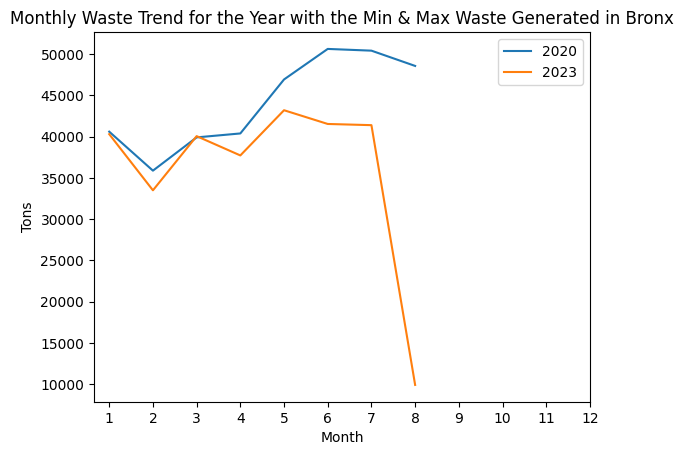

<Figure size 1000x1000 with 0 Axes>

In [53]:
bronx_merged = bronx_max_waste.merge(
    bronx_min_waste,
    on = 'month'
)
bronx_merged = bronx_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Bronx'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Bronx'][1]}"})
bronx_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Bronx")
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

#### Manhattan

<Figure size 1000x1000 with 0 Axes>

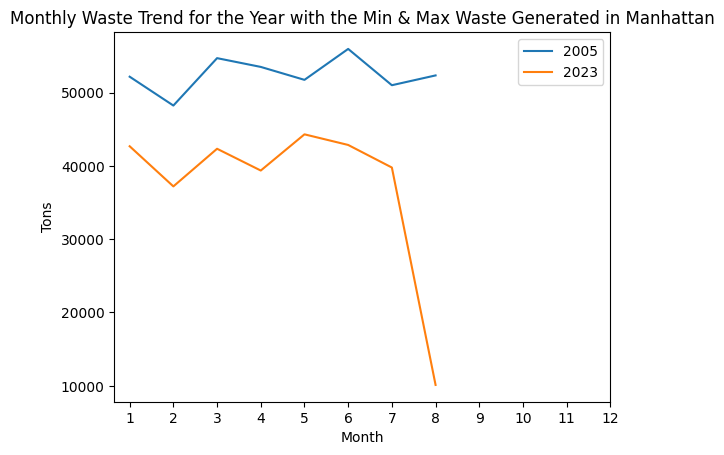

<Figure size 1000x1000 with 0 Axes>

In [54]:
manhattan_max_waste = monthly_tonnage_boroughs.loc['Manhattan'].loc[max_waste_year_boroughs['Manhattan'][1]]
manhattan_min_waste = monthly_tonnage_boroughs.loc['Manhattan'].loc[min_waste_year_boroughs['Manhattan'][1]]
manhattan_merged = manhattan_max_waste.merge(
    manhattan_min_waste,
    on = 'month'
)
manhattan_merged = manhattan_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Manhattan'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Manhattan'][1]}"})
manhattan_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Manhattan")
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

#### Brooklyn

<Figure size 1000x1000 with 0 Axes>

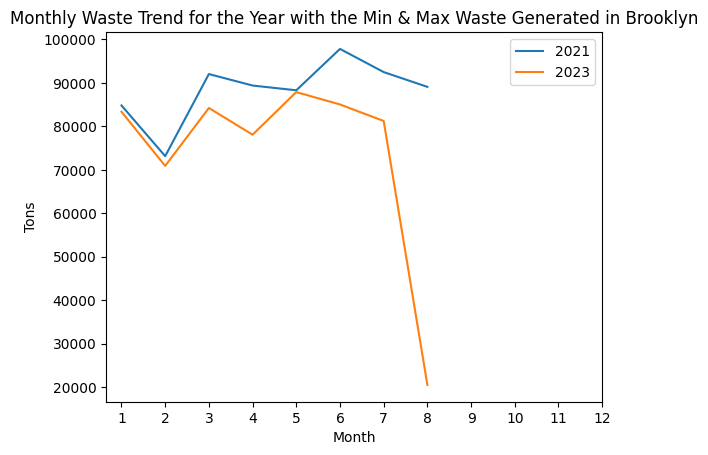

<Figure size 1000x1000 with 0 Axes>

In [55]:
brooklyn_max_waste = monthly_tonnage_boroughs.loc['Brooklyn'].loc[max_waste_year_boroughs['Brooklyn'][1]]
brooklyn_min_waste = monthly_tonnage_boroughs.loc['Brooklyn'].loc[min_waste_year_boroughs['Brooklyn'][1]]
brooklyn_merged = brooklyn_max_waste.merge(
    brooklyn_min_waste,
    on = 'month'
)
brooklyn_merged = brooklyn_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Brooklyn'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Brooklyn'][1]}"})
brooklyn_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Brooklyn")
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

#### Queens

<Figure size 1000x1000 with 0 Axes>

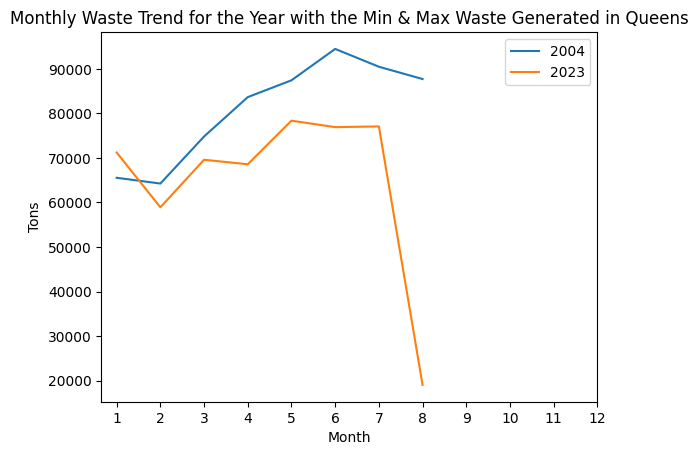

<Figure size 1000x1000 with 0 Axes>

In [56]:
queens_max_waste = monthly_tonnage_boroughs.loc['Queens'].loc[max_waste_year_boroughs['Queens'][1]]
queens_min_waste = monthly_tonnage_boroughs.loc['Queens'].loc[min_waste_year_boroughs['Queens'][1]]
queens_merged = queens_max_waste.merge(
    queens_min_waste,
    on = 'month'
)
queens_merged = queens_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Queens'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Queens'][1]}"})
queens_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Queens")
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

#### Staten Island

<Figure size 1000x1000 with 0 Axes>

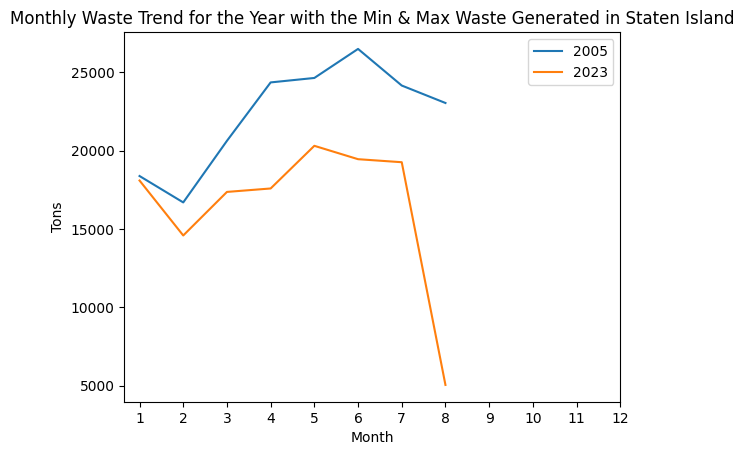

<Figure size 1000x1000 with 0 Axes>

In [57]:
staten_max_waste = monthly_tonnage_boroughs.loc['Staten Island'].loc[max_waste_year_boroughs['Staten Island'][1]]
staten_min_waste = monthly_tonnage_boroughs.loc['Staten Island'].loc[min_waste_year_boroughs['Staten Island'][1]]
staten_merged = staten_max_waste.merge(
    staten_min_waste,
    on = 'month'
)
staten_merged = staten_merged.rename(columns={'totalWaste_x':f"{max_waste_year_boroughs['Staten Island'][1]}",'totalWaste_y':f"{min_waste_year_boroughs['Staten Island'][1]}"})
staten_merged.plot()
plt.ylabel('Tons')
plt.xlabel('Month')
plt.title("Monthly Waste Trend for the Year with the Min & Max Waste Generated in Staten Island")
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(1,13))
plt.figure(figsize=(10,10))

## Recycling Dataset

In [58]:
client = Socrata('data.cityofnewyork.us',
                 '7lNEaKU6tflxrc2RGLtO8riHn',
                 username="cv25h2tpnfgm0x6xor5wfx2pt",
                 password="1hdkfdyecseu5ryqf64y0rnkszph7oyf8h0o1zzjw2krtwl73p")

results = client.get("gaq9-z3hz", limit=3000)

# Convert to pandas DataFrame
q6 = pd.DataFrame.from_records(results)

In [59]:
q6.drop(['district','capture_rate_paper_total_paper_max_paper_', 'capture_rate_mgp_total_mgp_max_mgp_','capture_rate_total_total_recycling_leaves_recycling_max_paper_max_mgp_x100'], axis=1, inplace=True)

In [60]:
q6['diversion_rate_total_total_recycling_total_waste_'] = round(q6['diversion_rate_total_total_recycling_total_waste_'].astype(float),2)

In [61]:
q6['Borough'] = q6['_zone'].replace({'Brooklyn North': 'Brooklyn', 'Brooklyn South': 'Brooklyn', 'Queens East': 'Queens', 'Queens West': 'Queens'})
recycling = q6.groupby(['Borough', 'fiscal_year'])['diversion_rate_total_total_recycling_total_waste_'].mean()
bronx_recycling = recycling['Bronx'].to_list()
brooklyn_recycling = recycling['Brooklyn'].to_list()
manhattan_recycling = recycling['Manhattan'].to_list()
queens_recycling = recycling['Queens'].to_list()
staten_recycling = recycling['Staten Island'].to_list()
recycling_years = list(recycling['Bronx'].index)


Text(0.5, 1.0, 'Diversion Rates in % by Borough')

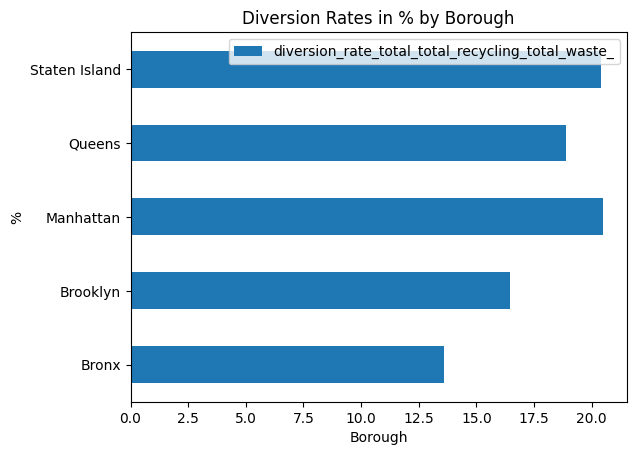

In [62]:
q6[['Borough','diversion_rate_total_total_recycling_total_waste_']].groupby('Borough').mean().plot(kind = 'barh')
plt.ylabel('%')
plt.xlabel('Borough')
plt.title("Diversion Rates in % by Borough")

In [63]:
recycling_yearly_trends = q6[['fiscal_year', 'diversion_rate_total_total_recycling_total_waste_']].groupby('fiscal_year')['diversion_rate_total_total_recycling_total_waste_'].mean()
recycling_yearly_trends

fiscal_year
2016    16.743630
2017    17.319661
2018    17.852853
2019    18.019647
Name: diversion_rate_total_total_recycling_total_waste_, dtype: float64

## Scorecard Ratings Dataset

In [64]:
client = Socrata('data.cityofnewyork.us',
                 '7lNEaKU6tflxrc2RGLtO8riHn',
                 username="cv25h2tpnfgm0x6xor5wfx2pt",
                 password="1hdkfdyecseu5ryqf64y0rnkszph7oyf8h0o1zzjw2krtwl73p")

results = client.get("rqhp-hivt", limit=46000)

# Convert to pandas DataFrame
q7 = pd.DataFrame.from_records(results)
q7['year'] = pd.DatetimeIndex(q7['month']).year
q7 = q7[['month', 'borough', 'acceptable_streets_feb_2014', 'year']]
q7.columns = ['Month', 'Borough', 'Acceptable Streets %', 'year']

In [65]:
q7['Acceptable Streets %'] = q7['Acceptable Streets %'].astype(float)

<ipython-input-65-fc914975285b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q7['Acceptable Streets %'] = q7['Acceptable Streets %'].astype(float)


### Street Cleanliness Ratings


#### Yearly Acceptable Streets - NYC as a Whole

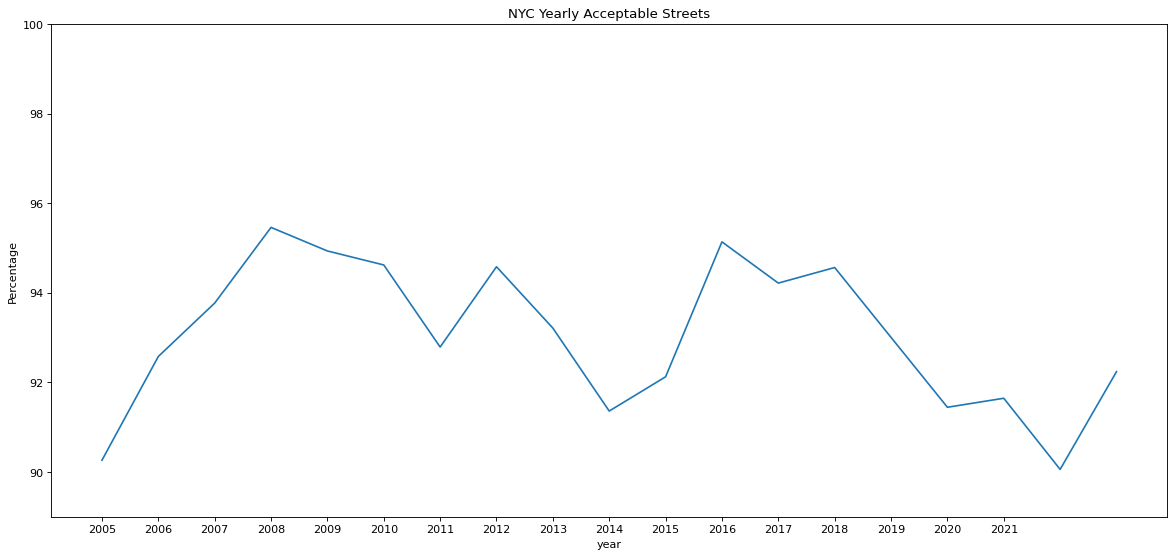

In [66]:
#yearly acceptable streets
plt.figure(figsize=(18, 8), dpi=80)
yearly_street = q7.loc[:,['Acceptable Streets %','year']]
yearly_street = yearly_street.groupby('year')['Acceptable Streets %'].mean()
yearly_street.plot(x ='year', y='Acceptable Streets %', kind='line')
plt.ylim(89, 100)
plt.ylabel('Percentage')
plt.title('NYC Yearly Acceptable Streets')
plt.xticks(np.arange(2005,2022))
plt.ticklabel_format(useOffset=False, style='plain')


#### Yearly Acceptable Streets - By Boroughs

In [67]:
#yearly acceptable streets by borough
boro_street = q7.groupby(['Borough', 'year'], as_index=False)['Acceptable Streets %'].mean()
boro_street

,Borough,year,Acceptable Streets %
0,Bronx,2005,89.683939
1,Bronx,2006,91.665152
2,Bronx,2007,92.876919
3,Bronx,2008,94.882146
4,Bronx,2009,93.992323
...,...,...,...
85,Staten Island,2018,98.414813
86,Staten Island,2020,98.642667
87,Staten Island,2021,98.384083
88,Staten Island,2022,97.297761


In [68]:
street = q7.groupby(['Borough', 'year'])['Acceptable Streets %'].mean()
bronx_street = street['Bronx'].to_list()
manhattan_street = street['Manhattan'].to_list()
brooklyn_street = street['Brooklyn'].to_list()
staten_street = street['Staten Island'].to_list()
queens_street = street['Queens'].to_list()

In [69]:
street_years = list(street['Brooklyn'].index)

In [70]:
street_cleanliness_rating = q7[['Acceptable Streets %','Borough']].groupby('Borough').mean()
street_cleanliness_rating = street_cleanliness_rating.sort_values(by='Acceptable Streets %', ascending=False)
street_cleanliness_rating

,Acceptable Streets %
Borough,
Staten Island,98.125812
Queens,95.262122
Manhattan,93.353991
Bronx,92.208632
Brooklyn,90.818979


<Axes: xlabel='Borough'>

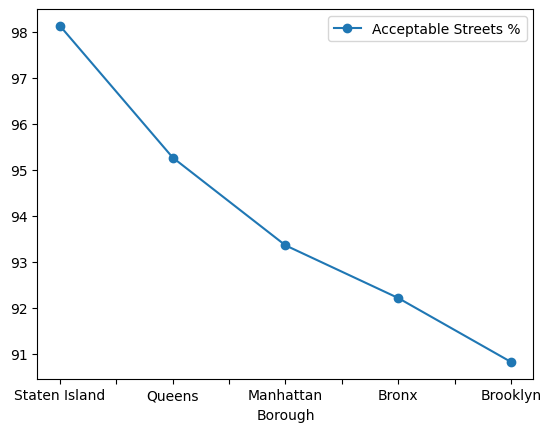

In [71]:
street_cleanliness_rating.plot(kind = 'line', marker = 'o')

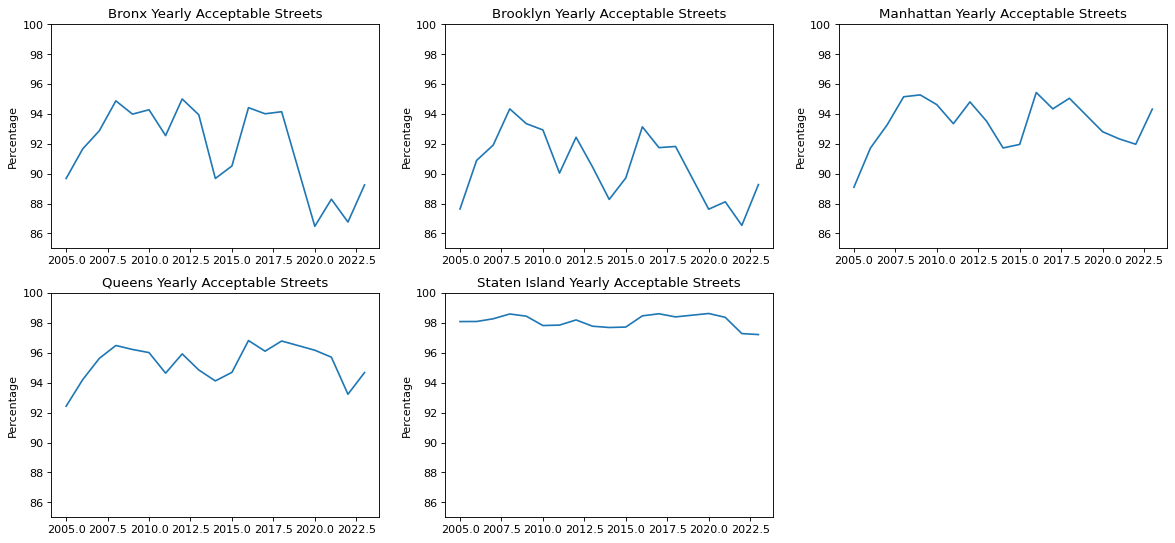

In [72]:
plt.figure(figsize=(18, 8), dpi=80) #resize figure

for i, b in enumerate(boroughs):
  curr = boro_street[boro_street.Borough == b]
  subplot_string = '23' + str(i + 1) #2 rows, 3 columns in total for our subplot, i is index of subplot
  plt.subplot(int(subplot_string)) #create the subplot
  plt.plot(curr['year'].values, curr['Acceptable Streets %'].values) #plot values
  plt.ylim(85, 100)
  plt.ylabel('Percentage')
  title = str(b) + ' Yearly Acceptable Streets' #make title
  plt.title(title)
  plt.ticklabel_format(useOffset=False, style='plain') #prevent scientific notation

## Generating NYC Map

In [73]:
!apt-get -qq install -y  libgeos-dev libproj-dev proj-data proj-bin libgdal-dev libspatialindex-dev
!pip install -q -U shapely rtree pygeos
!pip install -q geopandas descartes

import geopandas as gpd

# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
df_nyc = gpd.GeoDataFrame.from_file('https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile')

Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Unpacking libspatialindex6:amd64 (1.9.3-2) ...
Selecting previously unselected package libspatialindex-c6:amd64.
Preparing to unpack .../libspatialindex-c6_1.9.3-2_amd64.deb ...
Unpacking libspatialindex-c6:amd64 (1.9.3-2) ...
Selecting previously unselected package libspatialindex-dev:amd64.
Preparing to unpack .../libspatialindex-dev_1.9.3-2_amd64.deb ...
Unpacking libspatialindex-dev:amd64 (1.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Setting up libspatialindex6:amd64 (1.9.3-2) ...
Setting up libspatialindex-c6:amd64 (1.9.3-2) ...
Setting up libspatialindex-dev:amd64 (1.9.3-2) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
/sbin/ldconfig

<Axes: >

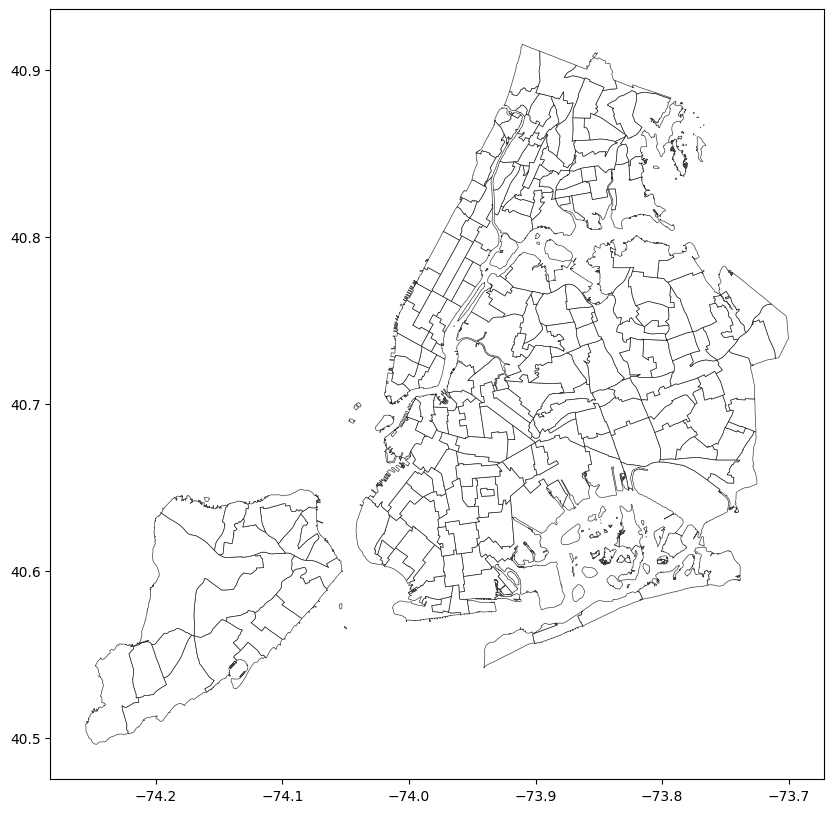

In [74]:
df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(10, 10),
    alpha=0.75
)

## Drop Off

In [75]:
client = Socrata('data.cityofnewyork.us',
                 '7lNEaKU6tflxrc2RGLtO8riHn',
                 username="cv25h2tpnfgm0x6xor5wfx2pt",
                 password="1hdkfdyecseu5ryqf64y0rnkszph7oyf8h0o1zzjw2krtwl73p")
# electronic data set
results = client.get("wshr-5vic", limit=2000)
# Convert to pandas DataFrame
electronics_df = pd.DataFrame.from_records(results)

# special waste
results = client.get("242c-ru4i", limit=2000)
# Convert to pandas DataFrame
specialwaste_df = pd.DataFrame.from_records(results)

# food waste
results = client.get("if26-z6xq", limit=2000)
# Convert to pandas DataFrame
food_df = pd.DataFrame.from_records(results)

In [76]:
electronics_df.rename(columns={'dropoff_sitename': 'name', 'latitude': 'lat', 'longitude': 'lon'}, inplace=True)
electronics_df = electronics_df[['borough', 'name', 'address', 'lat', 'lon']]

In [77]:
specialwaste_df.rename(columns = {'boro': 'borough'}, inplace=True)
specialwaste_df = specialwaste_df[['borough', 'name', 'address', 'point']]
specialwaste_df['borough'].replace({'1': 'Manhattan', '2': 'Bronx', '3': 'Brooklyn', '4': 'Queens', '5': 'Staten Island'}, inplace=True)

<ipython-input-77-42431ee00e69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specialwaste_df['borough'].replace({'1': 'Manhattan', '2': 'Bronx', '3': 'Brooklyn', '4': 'Queens', '5': 'Staten Island'}, inplace=True)


In [78]:
def extract_coordinates(row):
    coordinates = row['coordinates']
    return coordinates[0], coordinates[1]

specialwaste_df['lon'], specialwaste_df['lat'] = zip(*specialwaste_df['point'].apply(lambda x: extract_coordinates(x)))

<ipython-input-78-c4ffef90592c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specialwaste_df['lon'], specialwaste_df['lat'] = zip(*specialwaste_df['point'].apply(lambda x: extract_coordinates(x)))
<ipython-input-78-c4ffef90592c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specialwaste_df['lon'], specialwaste_df['lat'] = zip(*specialwaste_df['point'].apply(lambda x: extract_coordinates(x)))


In [79]:
food_df.rename(columns={'ntaname': 'name', 'location': 'address', 'latitude': 'lat', 'longitude': 'lon', 'operation_day_hours':
                        'hours', 'open_hours': 'open_hour', 'open_months': 'open_month'}, inplace=True)

## Flask Server

In [80]:
import os
import threading
from flask import Flask, render_template, jsonify, request
from pyngrok import ngrok
import base64
from io import BytesIO
import matplotlib.pyplot as plt
import geopandas as gpd

os.environ["FLASK_DEBUG"] = "true"
app = Flask(__name__, template_folder = '/content/drive/MyDrive/Projects in Programming & DS/Final Project/templates', static_folder = '/content/drive/MyDrive/Projects in Programming & DS/Final Project/templates')
port = 5000

In [81]:
os.system("kill -9 $(pgrep ngrok)")
ngrok_authtoken = '2GjfRSRldgBDhUP2qnFZTaYce59_5JgCjrZXvMS7UXJJqu96p'
ngrok.set_auth_token(ngrok_authtoken)
public_url = ngrok.connect(port).public_url
# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url
print(f" * ngrok tunnel '{public_url}' -> 'http://127.0.0.1:{port}'")

 * ngrok tunnel 'https://387c-34-90-141-234.ngrok-free.app' -> 'http://127.0.0.1:5000'


In [82]:
@app.route('/',  methods=['GET'])
def index():
    return render_template("homepage.html")

In [83]:
@app.route('/nycwaste', methods=['GET'])
def nyc():
  return render_template("nycwaste.html",
                         totalWasteCollected2022=totalWasteCollected2022,
                         totalPaper2022=totalPaper2022,
                         totalRefuse2022=totalRefuse2022,
                         totalMGP2022 = totalMGP2022,
                         percentageChangeWaste=percentageChangeWaste,
                         percentageChangePaper=percentageChangePaper,
                         percentageChangeRefuse=percentageChangeRefuse,
                         percentageChangeMGP=percentageChangeMGP,
                         yearly_data_chart_years=yearly_data_chart_years,
                         yearly_data_chart_values=yearly_data_chart_values,
                         yearly_paper_chart_years=yearly_paper_chart_years,
                         yearly_paper_chart_values=yearly_paper_chart_values,
                         yearly_mgp_chart_years=yearly_mgpt_chart_years,
                         yearly_mgp_chart_values=yearly_mgpt_chart_values,
                         yearly_refuse_chart_years=yearly_refuse_chart_years,
                         yearly_refuse_chart_values=yearly_refuse_chart_values,
                         years_boro_chart=years_boro_chart,
                         bronx_values = bronx_values,
                         manhattan_values = manhattan_values,
                         queens_values = queens_values,
                         staten_values = staten_values,
                         brooklyn_values = brooklyn_values,
                         pie_values = pie_values,
                         pie_labels = pie_labels,
                         current_year = current_year,
                         pie_dict = pie_dict)

In [84]:
@app.route('/boro', methods=['GET'])
def boro():
  return render_template("boro.html")

In [85]:
@app.route('/bronx', methods=['GET'])
def bronx():
  return render_template("bronx.html",
                         bronx_total_years=bronx_total_years,
                         bronx_values=bronx_values,
                         bronx_paper=bronx_paper,
                         bronx_refuse=bronx_refuse,
                         bronx_mgp=bronx_mgp,
                         bronx_street=bronx_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         bronx_recycling=bronx_recycling,
                         bronx_refuse_years=bronx_refuse_years,
                         bronx_paper_years=bronx_paper_years,
                         bronx_mgp_years=bronx_mgp_years
                         )

In [86]:
@app.route('/brooklyn', methods=['GET'])
def brooklyn():
  return render_template("brooklyn.html",
                         brooklyn_total_years=brooklyn_total_years,
                         brooklyn_values=brooklyn_values,
                         brooklyn_paper=brooklyn_paper,
                         brooklyn_refuse=brooklyn_refuse,
                         brooklyn_mgp=brooklyn_mgp,
                         brooklyn_street=brooklyn_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         brooklyn_recycling=brooklyn_recycling,
                         brooklyn_refuse_years=brooklyn_refuse_years,
                         brooklyn_paper_years=brooklyn_paper_years,
                         brooklyn_mgp_years=brooklyn_mgp_years
                         )

In [87]:
@app.route('/manhattan', methods=['GET'])
def manhattan():
  return render_template("manhattan.html",
                         manhattan_total_years=manhattan_total_years,
                         manhattan_values=manhattan_values,
                         manhattan_paper=manhattan_paper,
                         manhattan_refuse=manhattan_refuse,
                         manhattan_refuse_years=manhattan_refuse_years,
                         manhattan_mgp=manhattan_mgp,
                         manhattan_street=manhattan_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         manhattan_recycling=manhattan_recycling,
                         manhattan_paper_years=manhattan_paper_years,
                         manhattan_mgp_years=manhattan_mgp_years
                         )

In [88]:
@app.route('/queens', methods=['GET'])
def queens():
  return render_template("queens.html",
                         queens_total_years=queens_total_years,
                         queens_values=queens_values,
                         queens_paper=queens_paper,
                         queens_refuse=queens_refuse,
                         queens_mgp=queens_mgp,
                         queens_street=queens_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         queens_recycling=queens_recycling,
                         queens_refuse_years=queens_refuse_years,
                         queens_paper_years=queens_paper_years,
                         queens_mgp_years=queens_mgp_years
                         )

In [89]:
@app.route('/staten', methods=['GET'])
def staten():
  return render_template("staten.html",
                         staten_total_years=staten_total_years,
                         staten_values=staten_values,
                         staten_paper=staten_paper,
                         staten_refuse=staten_refuse,
                         staten_mgp=staten_mgp,
                         staten_street=staten_street,
                         street_years=street_years,
                         recycling_years=recycling_years,
                         staten_recycling=staten_recycling,
                         staten_refuse_years=staten_refuse_years,
                         staten_paper_years=staten_paper_years,
                         staten_mgp_years=staten_mgp_years
                         )

In [90]:
@app.route('/list_dropoffs',  methods=['GET'])
def list_dropoffs():
  return render_template("list_dropoffs.html")

In [91]:
# This is a function that connects to the database and returns back a
# list of food dropoffs. It has an optional paramter "search_name"
# which will limit the number of dropoffs that are returned.
#
# We also have the start/limit parameters that limit the number of
# returned dropoffs
def get_dropoffs(search_name=None, type_name = None, start=0, limit=1000):
  if type_name == "food":
    if search_name:
      dropoffs = food_df.query("address.str.contains(@search_name , na=False) or borough.str.contains(@search_name, na=False)")[
    ['borough', 'name', 'address', 'open_month', 'hours', 'notes', 'lat', 'lon']
]
    else:
      dropoffs = food_df[['borough', 'name', 'address', 'open_month', 'hours', 'notes', 'lat', 'lon']]
    dropoffs = dropoffs[~dropoffs['borough'].isnull()]
    return dropoffs
  elif type_name == "electronics":
    if search_name:
      dropoffs = electronics_df.query("address.str.contains(@search_name , na=False) or borough.str.contains(@search_name, na=False)")[['borough', 'name', 'address', 'lat', 'lon']]
    else:
      dropoffs = electronics_df[['borough', 'name', 'address', 'lat', 'lon']]
    dropoffs = dropoffs[~dropoffs['borough'].isnull()]
    return dropoffs
  elif type_name == "special_waste":
    if search_name:
      dropoffs = specialwaste_df.query("address.str.contains(@search_name , na=False) or borough.str.contains(@search_name, na=False)")[['borough', 'name', 'address', 'lat', 'lon']]
    else:
      dropoffs = specialwaste_df[['borough', 'name', 'address', 'lat', 'lon']]
    dropoffs = dropoffs[~dropoffs['borough'].isnull()]
    return dropoffs

In [92]:
# This is the API call that returns back a list of the food dropoffs
# Optionally we pass a query parameter call "name" which we then use to
# search for food dropoffs that contain that string in their name

@app.route('/dropoff_list_api')
def find_dropoffs():
  type_query = request.args.get('dropoff_type_query')
  search_query = request.args.get('dropoff_name_query')

  dropoffs = get_dropoffs(type_name = type_query, search_name = search_query)

  string_columns = dropoffs.select_dtypes(include='object').columns
  dropoffs[string_columns] = dropoffs[string_columns].fillna('N/A')

  # Convert integer columns to nullable integer type and replace None and NaN values with a specific format (e.g., -1)
  integer_columns = dropoffs.select_dtypes(include='integer').columns
  dropoffs[integer_columns] = dropoffs[integer_columns].astype(pd.Int64Dtype()).fillna(-1)
  # Convert the returned dataframe into a list of dictionaries
  list_of_dropoffs = dropoffs.to_dict(orient='records')
  api_results = {"dropoffs": list_of_dropoffs,"type_query": type_query, "search_query": search_query}

  # We JSON-ify our dictionary and return it as the API response
  return jsonify(api_results)

In [93]:
def create_dropoff_map_image(dropoffs):

  fig, ax = plt.subplots(figsize=(7, 5))

  # Create the map of NYC neighborhoods
  nyc_map = df_nyc.plot(linewidth=0.1, color='White', edgecolor='Gray', ax = ax)

  # Plot the matching dropoffs
  ax = dropoffs.plot(kind='scatter', x='lon', y='lat', s=3, ax=nyc_map)

  buf = BytesIO()
  fig.savefig(buf, format="png")
  b64encoded = base64.b64encode(buf.getbuffer())
  # Embed the result in the html output.
  image_data = b64encoded.decode("ascii")

  return image_data

In [94]:
# This API call returns a plot, in JSON format
# Specifically, this returns a map of NYC with the
# dropoffs that match the query
@app.route('/dropoff_map',  methods=['GET'])
def dropoff_map():

  search_query = request.args.get('dropoff_name_query')
  type_query = request.args.get('dropoff_type_query')

  dropoffs = get_dropoffs(search_name = search_query, type_name = type_query)
  dropoffs['lat'] = dropoffs['lat'].astype(float)
  dropoffs['lon'] = dropoffs['lon'].astype(float)
  string_columns = dropoffs.select_dtypes(include='object').columns
  dropoffs[string_columns] = dropoffs[string_columns].fillna('N/A')

  # Convert integer columns to nullable integer type and replace None and NaN values with a specific format (e.g., -1)
  integer_columns = dropoffs.select_dtypes(include='integer').columns
  dropoffs[integer_columns] = dropoffs[integer_columns].astype(pd.Int64Dtype()).fillna(-1)
  image_data = create_dropoff_map_image(dropoffs)

    # Create the response. We will put the retrieved data as a list of
    # dictionaries, under the key "dropoffs".
  results = {"image_data": "data:image/png;base64," + image_data}

  # We JSON-ify our dictionary and return it as the API response
  return jsonify(results)

 * ngrok tunnel 'https://387c-34-90-141-234.ngrok-free.app' -> 'http://127.0.0.1:5000'
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [22/Aug/2023 08:23:24] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Aug/2023 08:23:26] "GET /templates/assets/css/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Aug/2023 08:23:26] "GET /templates/assets/vendor/bootstrap-icons/bootstrap-icons.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Aug/2023 08:23:27] "GET /templates/assets/vendor/animate.css/animate.min.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Aug/2023 08:23:27] "GET /templates/assets/vendor/swiper/swiper-bundle.min.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Aug/2023 08:23:27] "GET /templates/assets/vendor/bootstrap/css/bootstrap.min.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Aug/2023 08:23:29] "GET /templates/assets/vendor/bootstrap/js/bootstrap.b

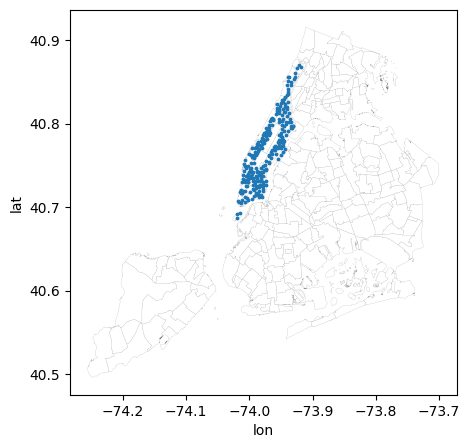

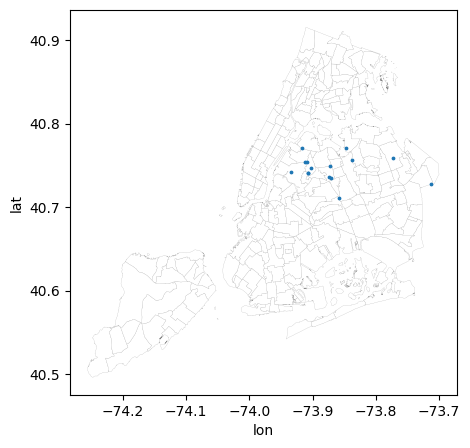

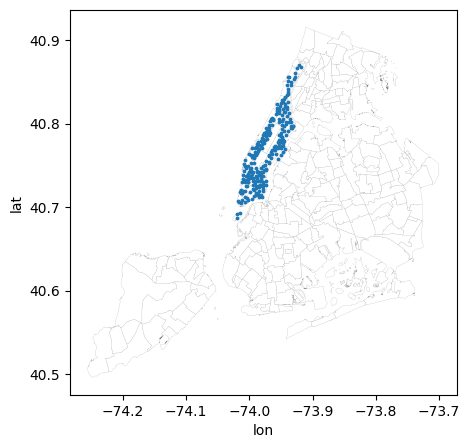

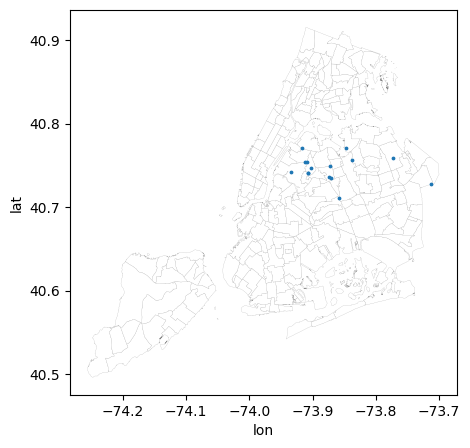

In [95]:
print(f" * ngrok tunnel '{public_url}' -> 'http://127.0.0.1:{port}'")
app.run(use_reloader=False)